<author> Zarko Ivkovic </author> \
University of Barcelona
\
\
This pdf is generated from jupyter notebook because we have to submit the homework this way. \
For convinence, you can find original jupyter notebook on my github [here](https://github.com/zarkoivkovicc/TCCM-Python-Homework).

## Numpy

In [2]:
import numpy as np

1. How to get common elements between two arrays?

In [3]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([4,7,15,3,5,6,9,1,12,14])

In [4]:
np.intersect1d(a,b)

array([1, 3, 4, 5, 6])

2. How to remove from array a items that exist in array b?

In [5]:
# Definition of two arrays
a = np.array([1,3,5,7,9])
b = np.array([2,4,6,8,10])

In [6]:
# Solution
a[~np.isin(a,b)]

array([1, 3, 5, 7, 9])

3. Replace all even numbers in array ‘a’ with the new value ‘-2’:

In [7]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# Solution
a[a%2 == 0] = -2
a # Show the result

array([-2,  1, -2,  3, -2,  5, -2,  7, -2,  9])

4. Swap the last two rows of the following array:

In [9]:
a = np.arange(25).reshape(5,5)

In [10]:
#Solution
a[[-1,-2]] = a[[-2,-1]]
a # Show the result

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19]])

## Matplotlib {-}

5. Draw a scatter plot with the following data: s_x and s_y

In [11]:
s_x = range(1, 25)
s_y = [1 / x for x in s_x]
s_z = [1 / (25 - x) for x in s_x]

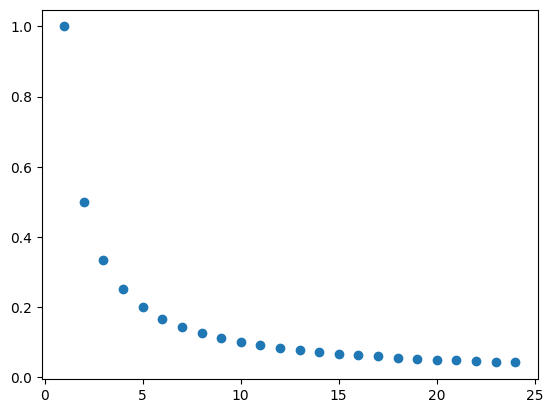

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(s_x,s_y, label="s_y");

1. Overlap in this plot the additional dataset s_z, and add a proper legend to the plot, axes labels and a
title

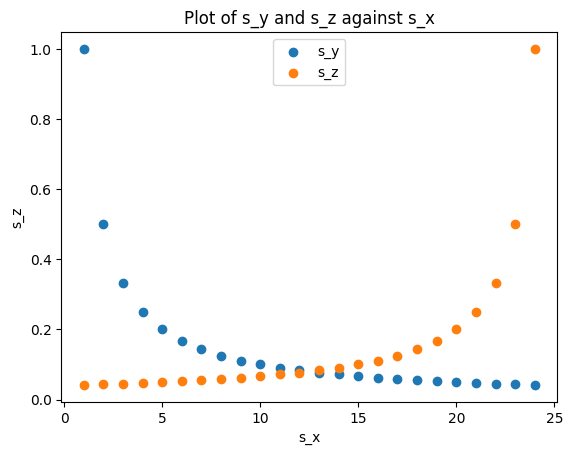

In [13]:
ax.scatter(s_x,s_z, label="s_z")
ax.set_title("Plot of s_y and s_z against s_x")
ax.set_xlabel("s_x")
ax.set_ylabel("s_z")
ax.legend()
fig # Show the figure again

2. Generate 2 subplots in a figure using datasets s_y and s_z, and add a proper legend to the plots and a
title

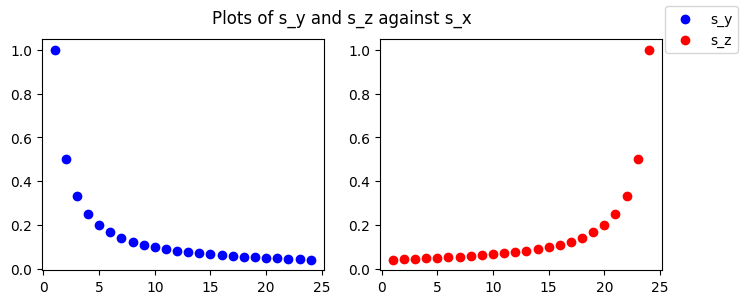

In [14]:
fig, axes = plt.subplots(1,2,figsize=(8, 3))
axes[0].scatter(s_x,s_y,label="s_y", color='blue')
axes[1].scatter(s_x,s_z,label="s_z", color='red')
fig.suptitle("Plots of s_y and s_z against s_x")
fig.legend();
# If the labels for axes are necessary, it's possible to add like this:
#for ax, y_label in zip(axes,["s_y", "s_z"]):
#    ax.set_xlabel("s_x")
#    ax.set_ylabel(y_label)

## Pandas {-}

6. Prepare the plot “Root Mean Square Fluctuation vs Residue Number” (Potasium Ion Channel Kv1.2)
by using the following input file 'rmsf.xvg'

* First we will load the data into dataframe object and print it

In [15]:
import pandas as pd
columns = ["Residue_Number", "RMSF"]
#Load data with numpy, as it supports multiple comment delimiters (unlike pandas)
clean_data = np.loadtxt("rmsf.xvg",comments=["#","@"])
df = pd.DataFrame(clean_data,columns=columns).convert_dtypes()
df # Show the dataframe

,Residue_Number,RMSF
0,1,0.3253
1,2,0.2577
2,3,0.233
3,4,0.1791
4,5,0.1793
...,...,...
2843,2844,0.1707
2844,2845,0.1805
2845,2846,0.1921
2846,2847,0.1935


* Let's see a random sample of 10 rows from the data

In [16]:
df.sample(10)

,Residue_Number,RMSF
2183,2184,0.1278
1077,1078,0.182
2497,2498,0.178
187,188,0.3403
2475,2476,0.1678
2363,2364,0.2871
1205,1206,0.3289
1959,1960,0.223
2711,2712,0.2668
915,916,0.1091


* Now let's see the basic statistic of the data

In [17]:
df.describe()

,Residue_Number,RMSF
count,2848.0,2848.0
mean,1424.5,0.205974
std,822.291108,0.078368
min,1.0,0.0852
25%,712.75,0.147175
50%,1424.5,0.1878
75%,2136.25,0.246525
max,2848.0,0.6545


* Thanks to _convert_dtypes_( ) method, we can see that each column is represented by best possible datatype

In [18]:
df.dtypes

Residue_Number      Int64
RMSF              Float64
dtype: object

Let's create a new dataframe df2 and add a new column to that dataframe _RMSF_2_, where we store squares of _RMSF_ column values

In [19]:
df2 = df.copy()
df2["RMSF_2"] = df2["RMSF"]**2
df2.to_parquet("RMSD_2")
df2 # Show the dataframe

,Residue_Number,RMSF,RMSF_2
0,1,0.3253,0.10582
1,2,0.2577,0.066409
2,3,0.233,0.054289
3,4,0.1791,0.032077
4,5,0.1793,0.032148
...,...,...,...
2843,2844,0.1707,0.029138
2844,2845,0.1805,0.03258
2845,2846,0.1921,0.036902
2846,2847,0.1935,0.037442


* Finally, let's plot the RMSF vs Residue_Number and save it as _jpeg_ picture

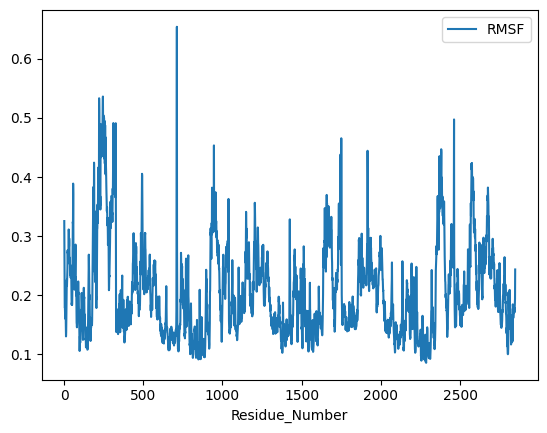

In [20]:
ax = df.plot(x=columns[0],y=columns[1])
#Optinally we can set the y label
#ax.set_ylabel("nm")
ax.figure.savefig("RMSF_plot.jpeg")